In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

importing the necessary libs


In [2]:
weight=0.7
bias=0.3
start=0
end=2
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias


In [3]:
train_split=int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]


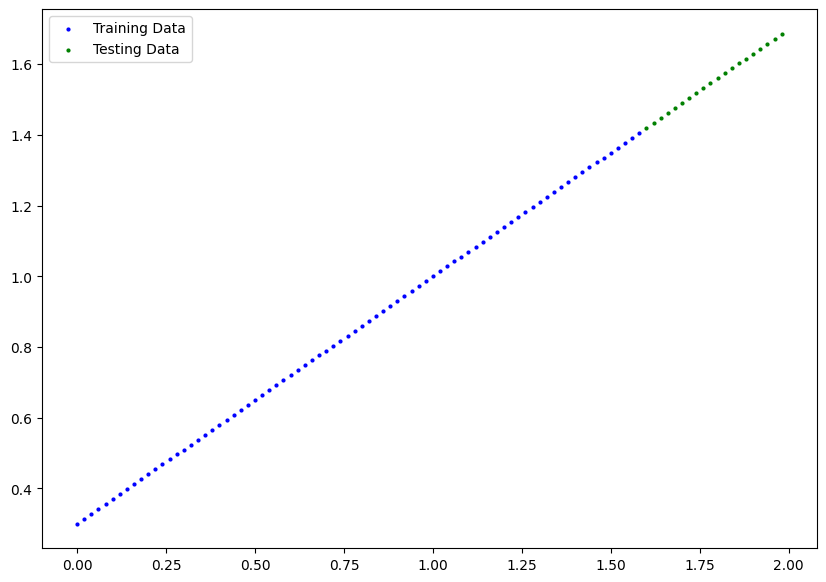

In [4]:

def plot_predictions(train_data=X_train,
                      train_labels=y_train,
                      test_data=X_test,
                      test_labels=y_test,
                      predictions=None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_labels,c='b',s=4,  label='Training Data')
    plt.scatter(test_data,test_labels,c='g',s=4,  label='Testing Data')
    if predictions is not None:
        plt.scatter(test_data,predictions,c='r',s=4, label='Predictions')
    plt.legend()
    plt.show()

plot_predictions()


In [ ]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

  def forward(self,x:torch.tensor)-> torch.Tensor:
    return self.weights*x+self.bias


In [ ]:
torch.manual_seed(42)
model_0=Model()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

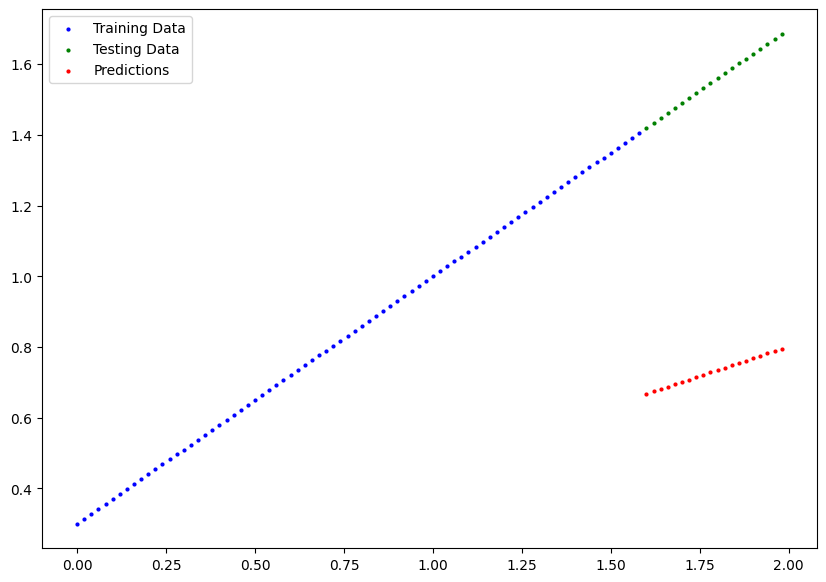

In [ ]:
# prediction mode
with torch.inference_mode():
  y_pred=model_0.forward(X_test)
plot_predictions(predictions=y_pred)
# y_pred

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
epochs=500
# Mean absolute Loss
loss_fn=nn.L1Loss()
#  Stotastic gradient descent
optimizer=torch.optim.SGD(model_0.parameters(),lr=0.01)

In [ ]:
#  track different values
epoch_count=[]
loss_values=[]
test_loss_values=[]

# training loop
for epoch in range(epochs):

  #  puts model in the training mode
  model_0.train()

  # 2.Predict the values using forward method
  y_pred=model_0.forward(X_train)

  # 3. Calculate the loss based on training set labels
  loss=loss_fn(y_pred,y_train)
  # print(f'Loss:{loss}')

  #4. Remove the accumulated gradient before calling the backward (calculate the differentiation value )
  optimizer.zero_grad()

  #5. Call the Backward method to calculate the gradient
  loss.backward()

  #6. step optimizer to get the new step This is where m = m - lr(slope) happens!
  optimizer.step()

  # Testing----------------------      ------------------         ---------------        --------------------------------------
  model_0.eval()# turns of the different settings in model not needed for evaluation/testing
  with torch.inference_mode():# turns off the gradient tracking and a couple more things behind the scenes

    # same as the forward pass
    test_pred=model_0(X_test)

    # calculate the loss using loss function on the test data each time we train
    test_loss=loss_fn(test_pred,y_test)
  # every 10 epoch print the losses test and training
  if epoch%10==0:
    print(f'Epoch: {epoch} | MAE Train Loss :{loss} | MAE Test loss :{test_loss}')

    epoch_count.append(epoch)
    loss_values.append(loss.item())
    test_loss_values.append(test_loss.item())

    # printing the model params at each state
    print(model_0.state_dict())



Epoch: 0 | MAE Train Loss :0.4582051634788513 | MAE Test loss :0.79737389087677
OrderedDict([('weights', tensor([0.3446])), ('bias', tensor([0.1388]))])
Epoch: 10 | MAE Train Loss :0.29579514265060425 | MAE Test loss :0.5559636950492859
OrderedDict([('weights', tensor([0.4236])), ('bias', tensor([0.2388]))])
Epoch: 20 | MAE Train Loss :0.13775773346424103 | MAE Test loss :0.3183403015136719
OrderedDict([('weights', tensor([0.5024])), ('bias', tensor([0.3353]))])
Epoch: 30 | MAE Train Loss :0.05683191865682602 | MAE Test loss :0.1473972052335739
OrderedDict([('weights', tensor([0.5704])), ('bias', tensor([0.3846]))])
Epoch: 40 | MAE Train Loss :0.038264136761426926 | MAE Test loss :0.07959795743227005
OrderedDict([('weights', tensor([0.6090])), ('bias', tensor([0.3833]))])
Epoch: 50 | MAE Train Loss :0.02902190014719963 | MAE Test loss :0.056470006704330444
OrderedDict([('weights', tensor([0.6325])), ('bias', tensor([0.3643]))])
Epoch: 60 | MAE Train Loss :0.019925223663449287 | MAE Tes

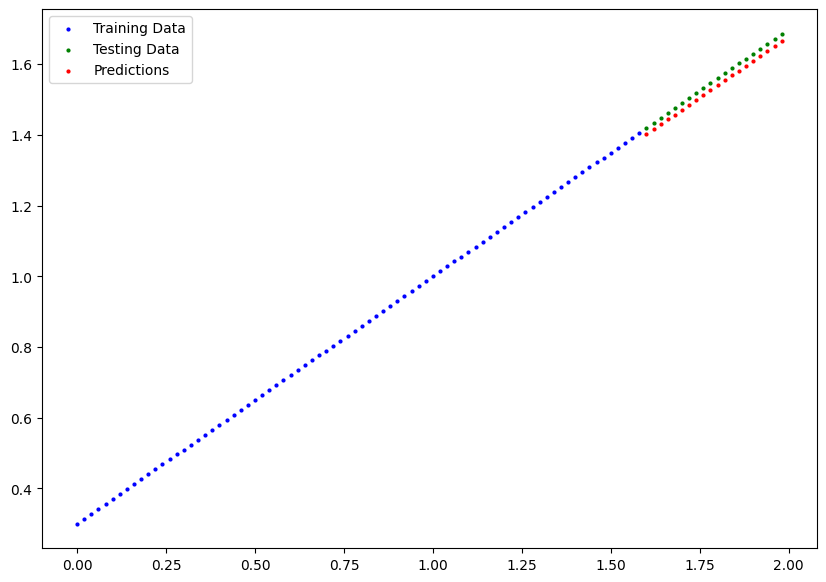

In [ ]:
plot_predictions(predictions=test_pred)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6922])), ('bias', tensor([0.2946]))])

In [ ]:
def plot_loss(epoch_count=epoch_count,training_loss=loss_values,test_loss_values=test_loss_values):
  plt.figure(figsize=(10,7))
  plt.plot(epoch_count,training_loss,c='r',label='Training Loss')
  plt.plot(epoch_count,test_loss_values,c='blue',label='Test Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()


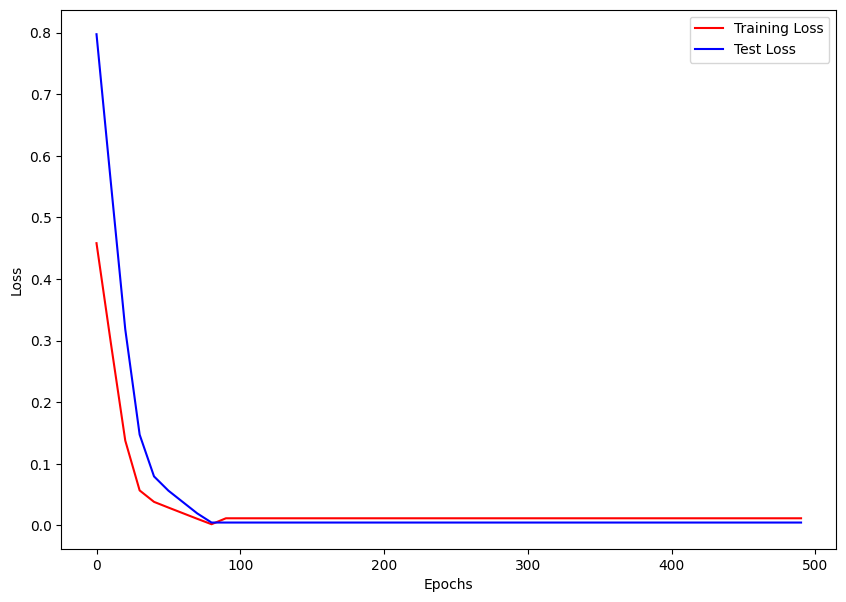

In [ ]:
plot_loss()

In [ ]:
# saving a model
# torch.save()
# torch.load()
# torch.nn.Module.load_state_dict

In [ ]:
from pathlib import Path
#  1 create a models directory
MODEL_PATH=Path('models')
MODEL_PATH.mkdir(parents=True,exist_ok=True)

# 2 create model save path
MODEL_NAME='01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME


# 3 save the model in state_dict
print(f'saving the model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

saving the model to: models/01_pytorch_workflow_model_0.pth


In [ ]:
# !ls -l /content/drive/MyDrive/Colab\ Notebooks/models

In [ ]:
#  Loading the model
# to load in a saved dict we have to create the instance
loaded_model_0=Model()
# make instance of the same that was used to create class
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<ipython-input-481-5e37a1ab4909>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6922])), ('bias', tensor([0.2946]))])